In [26]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Define the Xavier initialization function
def initialize(input_size, hidden_size, output_size):
    w1 = np.random.randn(hidden_size, input_size) * np.sqrt(1.0 / input_size)
    b1 = np.zeros((hidden_size, 1))
    w2 = np.random.randn(output_size, hidden_size) * np.sqrt(1.0 / hidden_size)
    b2 = np.zeros((output_size, 1))
    return w1, b1, w2, b2


In [18]:
def forward_pass(a0, w1, b1, w2, b2):
    z1 = np.dot(w1, a0) + b1
    a1 = relu(z1)  # Use ReLU in the hidden layer
    z2 = np.dot(w2, a1) + b2
    a2 = tanh(z2)  # Use tanh for output layer
    return z1, a1, z2, a2

In [19]:
def gradient(a2, y, z2, a1, w2, z1, a0):
    dz2 = (a2 - y) * (1 - np.tanh(z2)**2)  # Derivative of tanh
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(w2.T, dz2) * (z1 > 0)  # ReLU derivative
    dw1 = np.dot(dz1, a0.T)
    db1 = np.sum(dz1, axis=1, keepdims=True)

    return dw1, db1, dw2, db2

In [20]:
# Define weight update function
def update_weights(w1, b1, w2, b2, dw1, db1, dw2, db2, eta):
    w1 -= eta * dw1
    b1 -= eta * db1
    w2 -= eta * dw2
    b2 -= eta * db2
    return w1, b1, w2, b2


In [21]:
def generate_reflection_data(num_samples=1000, img_size=(8, 8)):
    x_input = np.zeros((num_samples, img_size[0]//2 * img_size[1]))  # Left half of image
    x_ground = np.zeros((num_samples, img_size[0]//2 * img_size[1]))  # Right half of image

    for i in range(num_samples):
        img = np.random.rand(*img_size)  # Generate random 8x8 image
        left_half = img[:, :img_size[1]//2]  # Get left side
        right_half = np.fliplr(left_half)  # Mirror the left half to get the right half

        x_input[i, :] = left_half.flatten()  # Flatten and store
        x_ground[i, :] = right_half.flatten()

    return x_input, x_ground



In [22]:
def normalize_data(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1

In [23]:
eta = 0.01
epochs = 100
input_size = 32  # Left half of an 8x8 image (8x4)
hidden_size = 128  # Increased hidden layer size
output_size = input_size  # Right half should match left half in size

# Generate and normalize the dataset
x_input, x_ground = generate_reflection_data(1000, (8, 8))
x_input = normalize_data(x_input)
x_ground = normalize_data(x_ground)

# Initialize weights and biases
w1, b1, w2, b2 = initialize(input_size, hidden_size, output_size)

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for j in range(1000):
        a0 = x_input[j, :].T.reshape(input_size, 1)
        y = x_ground[j, :].T.reshape(output_size, 1)

        z1, a1, z2, a2 = forward_pass(a0, w1, b1, w2, b2)
        dw1, db1, dw2, db2 = gradient(a2, y, z2, a1, w2, z1, a0)
        w1, b1, w2, b2 = update_weights(w1, b1, w2, b2, dw1, db1, dw2, db2, eta)

        loss = np.sum((a2 - y) ** 2) * 0.5  # Mean squared error loss
        total_loss += loss

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/1000}')


Epoch 1/100, Loss: 1.6502733137142345
Epoch 11/100, Loss: 0.13473958679939183
Epoch 21/100, Loss: 0.09688105156265342
Epoch 31/100, Loss: 0.08265028099688168
Epoch 41/100, Loss: 0.07502315937807452
Epoch 51/100, Loss: 0.07013385009695647
Epoch 61/100, Loss: 0.06680299406807799
Epoch 71/100, Loss: 0.06442987956001224
Epoch 81/100, Loss: 0.06262742578293053
Epoch 91/100, Loss: 0.06116196543819352


In [24]:
def reflect_image(image_left):
    image_left = normalize_data(image_left.flatten().reshape(-1, 1))  # Normalize
    _, _, _, reflected = forward_pass(image_left, w1, b1, w2, b2)
    return reflected.reshape((8, 4))  # Reshape back to image format

# Example usage
sample_image = np.random.rand(8, 4)  # Example left half input
predicted_reflection = reflect_image(sample_image)
print("Predicted mirrored right side:\n", predicted_reflection)

Predicted mirrored right side:
 [[-0.35801632 -0.09871451  0.55405308  0.57032811]
 [-0.48823563  0.70398265  0.31797457 -0.59185797]
 [ 0.45200019 -0.21688098  0.69949667  0.48284484]
 [-0.13981379 -0.09491849 -0.6856401  -0.81942262]
 [ 0.20485335 -0.78840161 -0.208417    0.80477015]
 [ 0.56736211  0.31523491  0.81988451  0.55499559]
 [ 0.83107673 -0.53664894 -0.79764791  0.46771876]
 [-0.24279992  0.02738258  0.71179356  0.80707885]]


In [27]:
def plot_reflection(original_left, predicted_right):
    combined_image = np.hstack((original_left, predicted_right))  # Combine both halves
    plt.imshow(combined_image, cmap='gray')
    plt.title("Left Half (Input) | Predicted Right Half (Output)")
    plt.axis('off')
    plt.show()

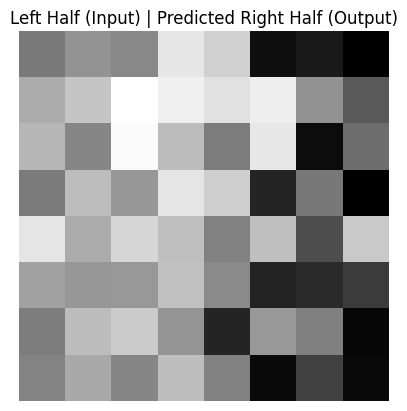

In [28]:
sample_image = np.random.rand(8, 4)  # Example left half input
predicted_reflection = reflect_image(sample_image)
plot_reflection(sample_image, predicted_reflection)

Saving image.jpg to image.jpg


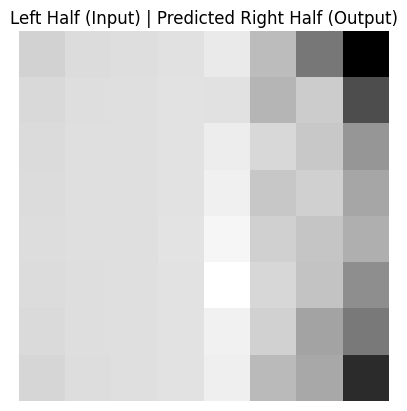

In [30]:
from google.colab import files
uploaded = files.upload()
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img_path = list(uploaded.keys())[0]  # Get the uploaded filename
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
img = cv2.resize(img, (8, 8))  # Resize to 8x8 for consistency
img = img / 255.0  # Normalize

# Extract left half
left_half = img[:, :4]  # Select the left 4 columns
# Predict the right half
predicted_right = reflect_image(left_half)

# Show the result
plot_reflection(left_half, predicted_right)